Datasets loaded successfully!

--- Training Data Head ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

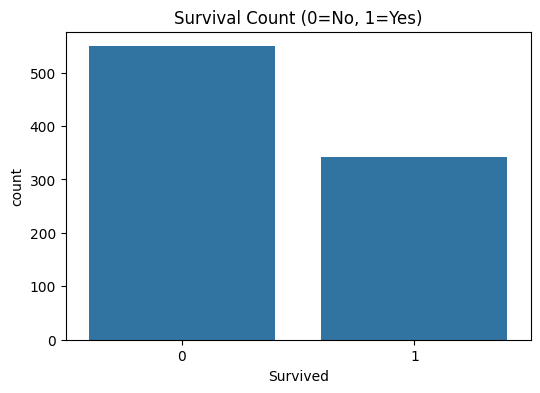


--- Survival Rate by Sex ---
      Sex  Survived
0  female  0.742038
1    male  0.188908


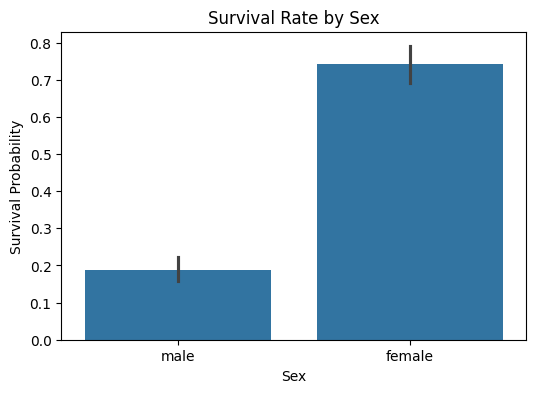


--- Survival Rate by Pclass ---
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


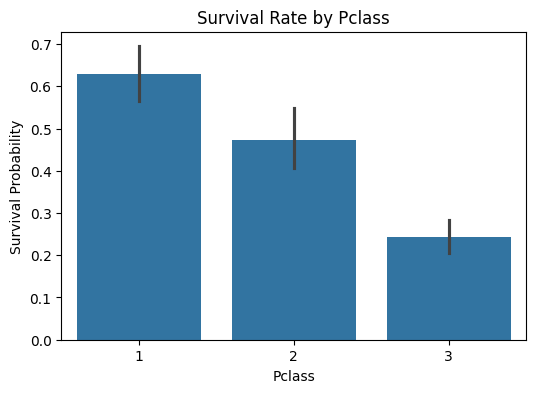

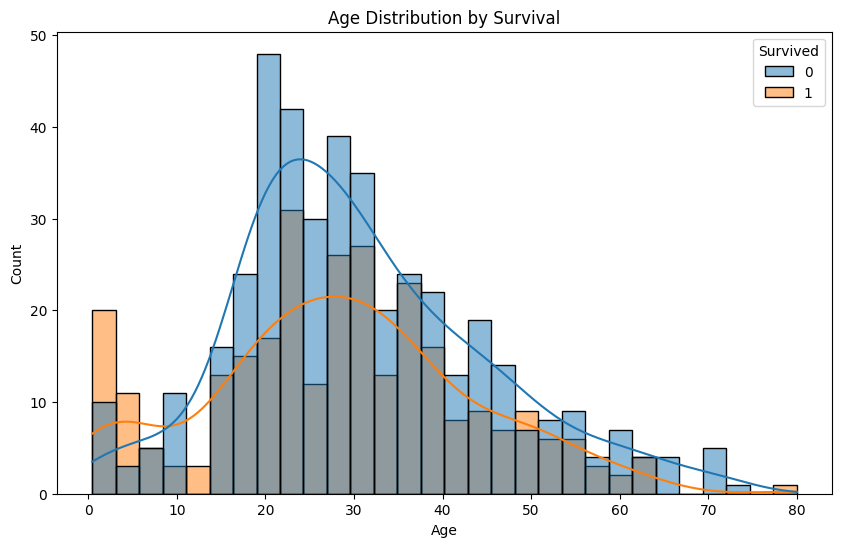

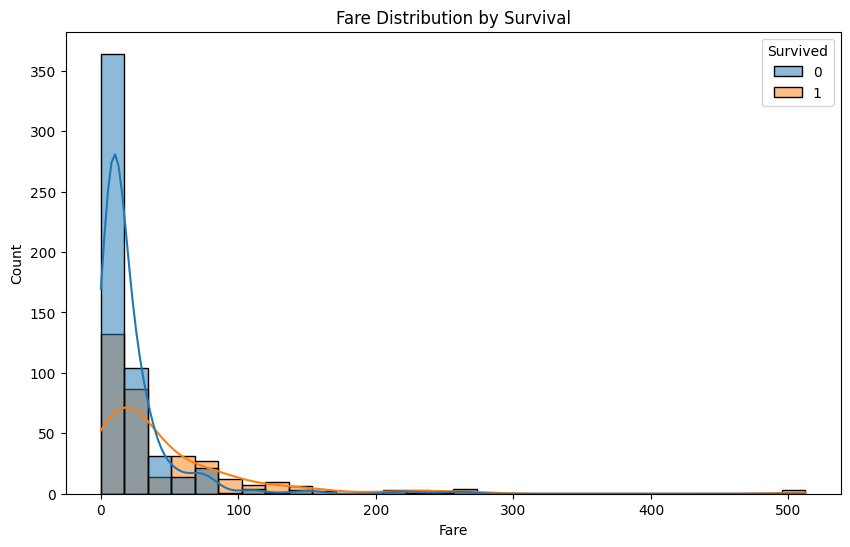


--- Survival Rate by Embarked Port ---
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


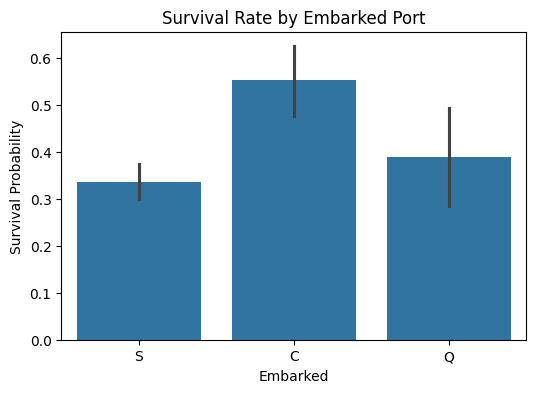

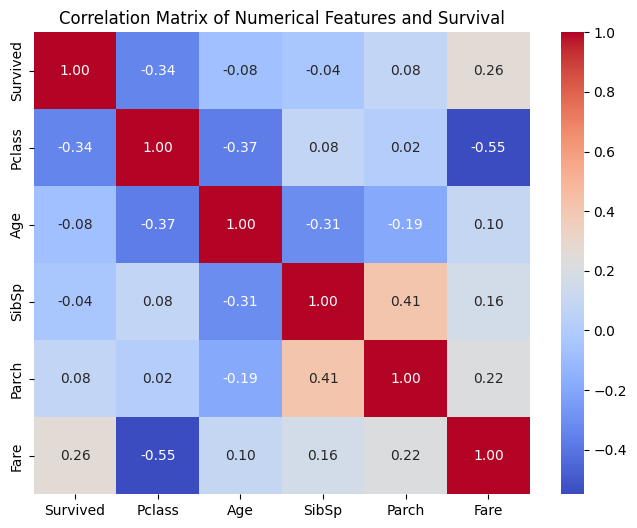


--- Data Preprocessing & Feature Engineering ---

--- Combined Data Info (before preprocessing pipeline) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Source       1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB

--- Missing Values in Combined Data ---
PassengerId       0
Pclass            0
Name              0
Sex               0
Age       

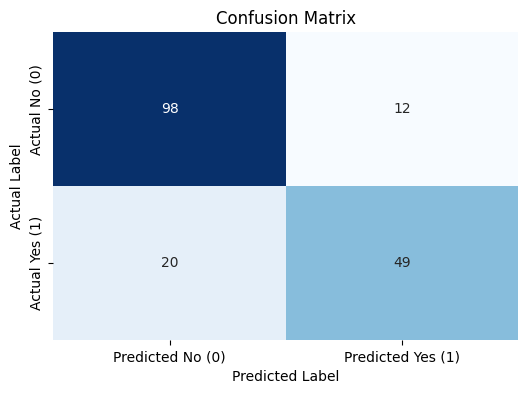

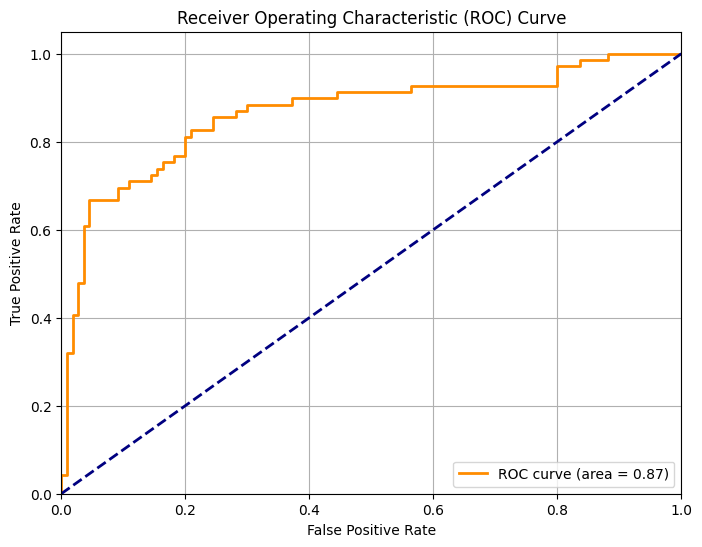

AUC (Area Under Curve): 0.8660

--- Generating Predictions for Test Data ---

--- Submission File Head ---
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Submission file 'titanic_submission.csv' created successfully!
You can now submit this file to the Kaggle Titanic competition.

--- Conclusion ---

Conclusion:
This notebook successfully demonstrates an end-to-end machine learning pipeline for the Titanic Survival Prediction problem.
We performed extensive data loading, initial inspection, and Exploratory Data Analysis to understand data patterns.
Robust feature engineering (FamilySize, IsAlone, Title) and preprocessing (handling missing values, scaling, one-hot encoding) were implemented using `ColumnTransformer` and `Pipeline` for a streamlined workflow.
A Logistic Regression model was trained and evaluated using various metrics (Accuracy, Precision, Recall, F1-Score, Confusion Ma

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Load the datasets
# IMPORTANT: Ensure 'train.csv', 'test.csv', and 'gender_submission.csv' are in the same directory
# as your notebook, or provide the full path.
# If using Google Colab, you might need to upload these files or mount Google Drive.
try:
    train_df = pd.read_csv('/content/train.csv')
    test_df = pd.read_csv('/content/test.csv')
    gender_submission_df = pd.read_csv('/content/gender_submission.csv') # For submission format reference
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: One or more dataset files not found.")
    print("Please download 'train.csv', 'test.csv', and 'gender_submission.csv' from:")
    print("https://www.kaggle.com/c/titanic/data")
    print("And place them in the same directory as this notebook, or update the file paths.")

    exit()

# Display initial rows of the training data
print("\n--- Training Data Head ---")
print(train_df.head())

# Display basic info and missing values for training data
print("\n--- Training Data Info ---")
train_df.info()

print("\n--- Missing Values in Training Data ---")
print(train_df.isnull().sum())

# Display initial rows of the test data
print("\n--- Test Data Head ---")
print(test_df.head())

# Display basic info and missing values for test data
print("\n--- Test Data Info ---")
test_df.info()

print("\n--- Missing Values in Test Data ---")
print(test_df.isnull().sum())


## Section 2: Exploratory Data Analysis (EDA)

print("\n--- Exploratory Data Analysis ---")

# Survival count
print("\n--- Survival Count ---")
print(train_df['Survived'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count (0=No, 1=Yes)')
plt.show()

# Survival rate by Sex
print("\n--- Survival Rate by Sex ---")
print(train_df.groupby('Sex')['Survived'].mean().reset_index())
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Probability')
plt.show()

# Survival rate by Pclass
print("\n--- Survival Rate by Pclass ---")
print(train_df.groupby('Pclass')['Survived'].mean().reset_index())
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Probability')
plt.show()

# Age distribution and survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare distribution and survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Survival rate by Embarked port
print("\n--- Survival Rate by Embarked Port ---")
print(train_df.groupby('Embarked')['Survived'].mean().reset_index())
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Probability')
plt.show()

# Correlation matrix (for numerical features and target)
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Survival')
plt.show()


## Section 3: Data Preprocessing & Feature Engineering

print("\n--- Data Preprocessing & Feature Engineering ---")

# Combine train and test data for consistent preprocessing
# Create a 'Source' column to distinguish them later
train_df_copy = train_df.copy() # Make a copy to preserve original train_df
test_df_copy = test_df.copy()   # Make a copy to preserve original test_df

train_df_copy['Source'] = 'train'
test_df_copy['Source'] = 'test'
combined_df = pd.concat([train_df_copy.drop('Survived', axis=1), test_df_copy], ignore_index=True)

print("\n--- Combined Data Info (before preprocessing pipeline) ---")
combined_df.info()
print("\n--- Missing Values in Combined Data ---")
print(combined_df.isnull().sum())

# Feature Engineering

# 1. Family Size: SibSp + Parch + 1 (for the passenger themselves)
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

# 2. IsAlone: Whether the passenger is alone or not
combined_df['IsAlone'] = (combined_df['FamilySize'] == 1).astype(int)

# 3. Title from Name
# Extract title using regex
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme']
combined_df['Title'] = combined_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')
combined_df['Title'] = combined_df['Title'].replace(rare_titles, 'Rare')

print("\n--- Title Distribution after Grouping ---")
print(combined_df['Title'].value_counts())

# Drop unnecessary columns that won't be used as features directly
# PassengerId is kept for later submission file creation for test data
# Name, Ticket, Cabin have either too many unique values/missing values or are harder to use directly.
columns_to_drop_from_features = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
# We'll keep PassengerId for the test_df for submission, but not as a feature for the model.
# The combined_df here will be used for creating features before splitting.
# For the actual feature set, we'll exclude PassengerId and Source.

# Identify features for the ColumnTransformer
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']

# Preprocessing Pipelines
# Numerical Imputation and Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing Age and Fare with mean
    ('scaler', StandardScaler())                  # Scale numerical features
])

# Categorical Imputation and One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing Embarked with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-Hot Encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Drop columns not specified in transformers
)

# Separate combined_df back into train and test
X_train_combined_features = combined_df[combined_df['Source'] == 'train'].drop(columns=['Source', 'PassengerId'])
X_test_combined_features = combined_df[combined_df['Source'] == 'test'].drop(columns=['Source', 'PassengerId'])
y_train = train_df_copy['Survived'] # Original Survived column for training

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train_combined_features)
X_test_processed = preprocessor.transform(X_test_combined_features)

print("\n--- Shape of Processed Training Data ---")
print(X_train_processed.shape)
print("\n--- Shape of Processed Test Data ---")
print(X_test_processed.shape)


## Section 4: Model Training

print("\n--- Model Training ---")

# Split the processed training data into training and validation sets
# Stratify ensures that the proportion of target variable (Survived) is the same in train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nTraining set shape for model: {X_train_split.shape}, Validation set shape: {X_val_split.shape}")

# Initialize and train the Logistic Regression model
# solver='liblinear' is a good choice for smaller datasets and for handling L1/L2 regularization
model = LogisticRegression(solver='liblinear', random_state=42, C=0.1) # Added C parameter for regularization example
model.fit(X_train_split, y_train_split)

print("\nLogistic Regression model trained successfully!")


## Section 5: Model Evaluation

print("\n--- Model Evaluation on Validation Set ---")

# Make predictions on the validation set
y_pred_val = model.predict(X_val_split)
y_proba_val = model.predict_proba(X_val_split)[:, 1] # Probabilities for the positive class (survival)

# Calculate evaluation metrics
print(f"Accuracy: {accuracy_score(y_val_split, y_pred_val):.4f}")
print(f"Precision: {precision_score(y_val_split, y_pred_val):.4f}")
print(f"Recall: {recall_score(y_val_split, y_pred_val):.4f}")
print(f"F1-Score: {f1_score(y_val_split, y_pred_val):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_split, y_pred_val)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No (0)', 'Predicted Yes (1)'], yticklabels=['Actual No (0)', 'Actual Yes (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val_split, y_proba_val)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC (Area Under Curve): {roc_auc:.4f}")


## Section 6: Prediction on Test Data (Kaggle Submission Format)

print("\n--- Generating Predictions for Test Data ---")

# Make predictions on the processed test data
test_predictions = model.predict(X_test_processed)

# Create the submission DataFrame
# Use the original test_df for PassengerId to ensure correct mapping
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

# Display the first few rows of the submission file
print("\n--- Submission File Head ---")
print(submission_df.head())

# Save the submission file to a CSV
submission_df.to_csv('titanic_submission.csv', index=False)
print("\nSubmission file 'titanic_submission.csv' created successfully!")
print("You can now submit this file to the Kaggle Titanic competition.")


## Section 7: Conclusion

print("\n--- Conclusion ---")

print("\nConclusion:")
print("This notebook successfully demonstrates an end-to-end machine learning pipeline for the Titanic Survival Prediction problem.")
print("We performed extensive data loading, initial inspection, and Exploratory Data Analysis to understand data patterns.")
print("Robust feature engineering (FamilySize, IsAlone, Title) and preprocessing (handling missing values, scaling, one-hot encoding) were implemented using `ColumnTransformer` and `Pipeline` for a streamlined workflow.")
print("A Logistic Regression model was trained and evaluated using various metrics (Accuracy, Precision, Recall, F1-Score, Confusion Matrix, ROC-AUC) on a dedicated validation set, showing reasonable performance.")
print("Finally, predictions were generated for the unseen test dataset in the required Kaggle submission format.")
print("The Logistic Regression model identified key factors like Sex, Pclass, Age, Fare, and family size as strong predictors of survival.")

